In [168]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

In [169]:
bank_data=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [170]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [171]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [172]:
bank_data['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [173]:
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [174]:
bank_data['Family'] = bank_data['Family'].astype('category')
bank_data['Education'] = bank_data['Education'].astype('category')
bank_data['Securities Account'] = bank_data['Securities Account'].astype('category')
bank_data['CD Account'] = bank_data['CD Account'].astype('category')
bank_data['Online'] = bank_data['Online'].astype('category')
bank_data['CreditCard'] = bank_data['CreditCard'].astype('category')


In [175]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937913,56.498800,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747666,101.713802,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000


<AxesSubplot:>

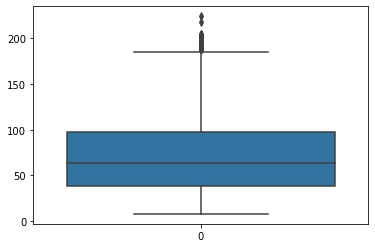

In [176]:
sns.boxplot(data=bank_data['Income'])

<AxesSubplot:>

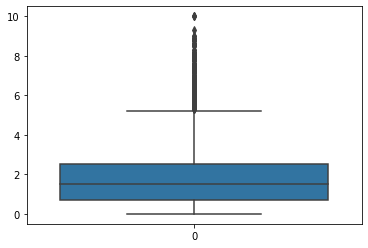

In [177]:
sns.boxplot(data=bank_data['CCAvg'])

<AxesSubplot:>

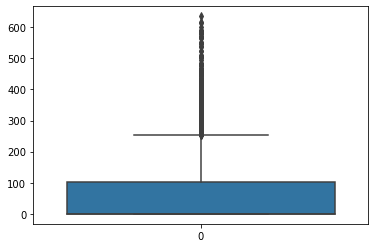

In [178]:
sns.boxplot(data=bank_data['Mortgage'])

In [179]:
#outlier Treatment

outlier_columns = ['Income','CCAvg','Mortgage']

for column in outlier_columns:
    iqr = np.percentile(bank_data[column],75) - np.percentile(bank_data[column],25)
    ll = np.percentile(bank_data[column],25) - (1.5 * iqr)
    ul = np.percentile(bank_data[column],75) + (1.5 * iqr)
    
    bank_data.loc[bank_data[column]>ul,column] = np.nan
    bank_data.loc[bank_data[column]<ll,column] = np.nan
    
    bank_data[column] = bank_data[column].fillna(bank_data[column].mean())

In [180]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   float64 
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   float64 
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(3), int64(5)
memory usage: 342.7 KB


In [181]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


In [182]:
bank_data.drop(['ID','ZIP Code','Mortgage'],axis=1,inplace=True)

In [183]:
bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0,0,0,0,1


In [184]:
bank_data_final = pd.get_dummies(bank_data)

In [185]:
bank_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   float64
 3   CCAvg                 5000 non-null   float64
 4   Personal Loan         5000 non-null   int64  
 5   Family_1              5000 non-null   uint8  
 6   Family_2              5000 non-null   uint8  
 7   Family_3              5000 non-null   uint8  
 8   Family_4              5000 non-null   uint8  
 9   Education_1           5000 non-null   uint8  
 10  Education_2           5000 non-null   uint8  
 11  Education_3           5000 non-null   uint8  
 12  Securities Account_0  5000 non-null   uint8  
 13  Securities Account_1  5000 non-null   uint8  
 14  CD Account_0          5000 non-null   uint8  
 15  CD Account_1         

In [186]:
features = [col for col in bank_data_final.columns if col != 'Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(bank_data_final[features], bank_data_final['Personal Loan'], test_size=.2, random_state=22,)
X_train.shape, X_test.shape

((4000, 19), (1000, 19))

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
logisticRegr = LogisticRegression(solver='liblinear')

In [189]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [190]:
predictions = logisticRegr.predict(X_test)

In [191]:
score = logisticRegr.score(X_train, y_train)
print("Train:",score)
score = logisticRegr.score(X_test, y_test)
print("Test:",score)

Train: 0.95925
Test: 0.962


In [192]:
from sklearn.metrics import confusion_matrix

In [194]:
from sklearn.metrics import precision_score

In [195]:
precision_score(y_test, predictions, average='macro')

0.9069124423963133